# My cats and dogs images classifyer

In [2]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler


# Loading the data in

In [3]:
train_dir = 'C:/Users/Henok/Desktop/pytorch/Cat_Dog_data/train'
test_dir = 'C:/Users/Henok/Desktop/pytorch/Cat_Dog_data/test'

train_transform = transforms.Compose([transforms.Resize(64),
                                transforms.RandomResizedCrop(64),
                                transforms.RandomHorizontalFlip(), # randomly flip and rotate
                                transforms.RandomRotation(10),
                                transforms.ToTensor(), 
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])

test_transform = transforms.Compose([transforms.Resize(64),
                                transforms.CenterCrop(64),
                                transforms.ToTensor(), 
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])
train_data = datasets.ImageFolder(train_dir, transform=train_transform)
test_data = datasets.ImageFolder(test_dir, transform=test_transform)

In her we separate out training set into trainset and validation set
we fist define a the persentage of our trainning set we want our validation set to be 
the we make use of the sampler "SubsetRandomSampler()" from "torch.utils.data.sampler"

In [4]:
# seting the persentage of the validation size th 20%
val_size = 0.2
batch_size = 32
# obtain training indices that will be used for validation
len_train_set = len(train_data)

# create a list that will hold all the indeces of the trainning dataset and shuffle this list
indices = list(range(len_train_set))
np.random.shuffle(indices)

# np.floor(a) ---> gives the smalest int value closest to a
split = int(np.floor(val_size * len_train_set))

# isn't this beautiful... God!!! I love python 
train_idx, val_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
val_sampler = SubsetRandomSampler(val_idx)

In [5]:
# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler)

valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=val_sampler)

test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle = True)

In [6]:
# specify the image classes
classes = ["Cat", "Dog"]

## Let's visualize the data we imported

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

tensor(1)


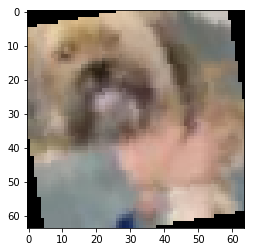

In [8]:
images, lables = next(iter(train_loader))
img_idx = 10
img = images[img_idx]

imshow(img)
img.shape
print(lables[img_idx])

# Defining our Networks Archtecture

In [8]:
"""
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        # convolutional layer
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 64, 3, padding=1)
        self.conv5 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv6 = nn.Conv2d(128, 128, 3, padding=1)
        self.conv7 = nn.Conv2d(128, 256, 3, padding=1)
        self.conv8 = nn.Conv2d(256, 256, 3, padding=1)
        
        # Fully connected layer
        self.fc1 = nn.Linear(256, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 1)
        # max pooling layer
        
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        return x

# create a complete CNN
model = Net()
print(model)

# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()
"""

'\nimport torch.nn as nn\nimport torch.nn.functional as F\n\n# define the CNN architecture\nclass Classifier(nn.Module):\n    def __init__(self):\n        super(Classifier, self).__init__()\n        # convolutional layer\n        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)\n        self.conv2 = nn.Conv2d(32, 32, 3, padding=1)\n        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)\n        self.conv4 = nn.Conv2d(64, 64, 3, padding=1)\n        self.conv5 = nn.Conv2d(64, 128, 3, padding=1)\n        self.conv6 = nn.Conv2d(128, 128, 3, padding=1)\n        self.conv7 = nn.Conv2d(128, 256, 3, padding=1)\n        self.conv8 = nn.Conv2d(256, 256, 3, padding=1)\n        \n        # Fully connected layer\n        self.fc1 = nn.Linear(256, 256)\n        self.fc2 = nn.Linear(256, 256)\n        self.fc3 = nn.Linear(256, 1)\n        # max pooling layer\n        \n        self.pool = nn.MaxPool2d(2, 2)\n\n    def forward(self, x):\n        # add sequence of convolutional and max pooling layers\n       

In [9]:
"""import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        # convolutional layer
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 64, 3, padding=1)
        self.conv5 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv6 = nn.Conv2d(128, 128, 3, padding=1)
        
        # Fully connected layer
        self.fc1 = nn.Linear(128*8*8, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 2)
        
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        # Droput
        self.dropout = nn.Dropout(0.2)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        x = self.pool(F.relu(self.conv6(x)))
        
        
        # we take the output of the last pooling layer and flatten it
        x = x.view(-1, 128*8*8)
        # introduce droput to reduce overfitting
        
        x = self.dropout(x)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        return x
   """     

'import torch.nn as nn\nimport torch.nn.functional as F\n\n# define the CNN architecture\nclass Classifier(nn.Module):\n    def __init__(self):\n        super(Classifier, self).__init__()\n        # convolutional layer\n        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)\n        self.conv2 = nn.Conv2d(32, 32, 3, padding=1)\n        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)\n        self.conv4 = nn.Conv2d(64, 64, 3, padding=1)\n        self.conv5 = nn.Conv2d(64, 128, 3, padding=1)\n        self.conv6 = nn.Conv2d(128, 128, 3, padding=1)\n        \n        # Fully connected layer\n        self.fc1 = nn.Linear(128*8*8, 256)\n        self.fc2 = nn.Linear(256, 256)\n        self.fc3 = nn.Linear(256, 2)\n        \n        # max pooling layer\n        self.pool = nn.MaxPool2d(2, 2)\n        \n        # Droput\n        self.dropout = nn.Dropout(0.2)\n    \n    def forward(self, x):\n        x = F.relu(self.conv1(x))\n        x = F.relu(self.conv2(x))\n        x = F.relu(self.conv3(x))\n    

In [9]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier,self).__init__()
            # convolutions
        self.conv1 = nn.Conv2d(3,16,3,padding=1)
        self.conv2 = nn.Conv2d(16,32,3,padding=1)
        self.conv3 = nn.Conv2d(32,64,3,padding=1)

        # Max-pool
        self.pool = nn.MaxPool2d(2,2)

        # Dropout
        self.dropout = nn.Dropout(p=0.3)
        # Linear Layer
        self.fc1 = nn.Linear(8*8*64,512)
        self.fc2 = nn.Linear(512,512)

        # output
        self.out = nn.Linear(512,2)


    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        x = x.view(-1,8*8*64)

        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))

        x = self.out(x)
        #x = torch.sigmoid(x)
        x = F.log_softmax(x, dim=1)
        return x


model =  Classifier()
print(model)

Classifier(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.3)
  (fc1): Linear(in_features=4096, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (out): Linear(in_features=512, out_features=2, bias=True)
)


## Specify loss function and optimizer

In [10]:
import torch.optim as optim

# specify loss function
#criterion = nn.BCELoss()
#criterion = nn.NLLLoss()
criterion = nn.NLLLoss()
# specify optimizer
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [121]:
images, labels = next(iter(train_loader))

In [ ]:
for images, labels in train_loader:
    out = model(images)
    loss = criterion(torch.exp(out), labels)
    ##loss
    #print(labels)
    #print(torch.exp(out))
    #loss.item()*images.size(0)
    #len(test_loader.dataset)
    loss.backward()
    optimizer.step()
    print(loss)

tensor(-0.5312, grad_fn=<NllLossBackward>)
tensor(-0.5312, grad_fn=<NllLossBackward>)
tensor(-0.5312, grad_fn=<NllLossBackward>)
tensor(-0.5000, grad_fn=<NllLossBackward>)
tensor(-0.6250, grad_fn=<NllLossBackward>)
tensor(-0.5312, grad_fn=<NllLossBackward>)
tensor(-0.5312, grad_fn=<NllLossBackward>)
tensor(-0.5000, grad_fn=<NllLossBackward>)
tensor(-0.5312, grad_fn=<NllLossBackward>)
tensor(-0.6250, grad_fn=<NllLossBackward>)
tensor(-0.5625, grad_fn=<NllLossBackward>)
tensor(-0.5938, grad_fn=<NllLossBackward>)


In [50]:

out = model(images)
loss = criterion(torch.exp(out), labels)
loss

tensor(-0.5313, grad_fn=<NllLossBackward>)

# Training the Network

In [14]:
epochs = 15
train_losses, valid_losses, test_losses = [], [], []

In [137]:
# number of epochs to train the model
import time

print("Training started...")

valid_loss_min = np.Inf # track change in validation loss and we make it infinity to see it go down

for e in range(1, epochs+1):
    tic = time.time()
    # keep track of training and validation loss per bathc
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for images, labels in train_loader:
        # move tensors to GPU if CUDA is available
        #if train_on_gpu:
        #    data, target = images.cuda(), labels.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(images)
        # calculate the batch loss
        loss = criterion(output, labels)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        # I don't get why we have to multiply by batch size "*images.size(0)"
        train_loss += loss.item()*images.size(0)
        #train_loss += loss.item()
        
    ######################    
    # validate the model #
    ######################
    
    print("Validating the model")
    
    model.eval()
    for images, labels in valid_loader:
        # move tensors to GPU if CUDA is available
        #if train_on_gpu:
        #    data, target = images.cuda(), labels.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(images)
        # calculate the batch loss
        loss = criterion(output, labels)
        # update average validation loss 
        
        # I don't get why we have to multiply by batch size "*images.size(0)"
        valid_loss += loss.item()*images.size(0)
        #valid_loss += loss.item()
    # calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
    
    train_losses.append(train_loss)    
    valid_losses.append(valid_loss)
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        e, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'
              .format(valid_loss_min, valid_loss))
        
        torch.save(model.state_dict(), 'model_cat_and_dog2.pt')
        valid_loss_min = valid_loss
    toc = time.time()
    print(str((toc - tic) * 1000) + "ms")

Training started...
Validating the model
Epoch: 1 	Training Loss: 0.532483 	Validation Loss: 0.124038
Validation loss decreased (inf --> 0.124038).  Saving model ...
789507.8361034393ms
Validating the model
Epoch: 2 	Training Loss: 0.490507 	Validation Loss: 0.118168
Validation loss decreased (0.124038 --> 0.118168).  Saving model ...
408351.75824165344ms
Validating the model
Epoch: 3 	Training Loss: 0.473053 	Validation Loss: 0.111267
Validation loss decreased (0.118168 --> 0.111267).  Saving model ...
407654.88839149475ms
Validating the model
Epoch: 4 	Training Loss: 0.455690 	Validation Loss: 0.109896
Validation loss decreased (0.111267 --> 0.109896).  Saving model ...
411770.8134651184ms
Validating the model
Epoch: 5 	Training Loss: 0.447743 	Validation Loss: 0.107937
Validation loss decreased (0.109896 --> 0.107937).  Saving model ...
404195.8305835724ms
Validating the model
Epoch: 6 	Training Loss: 0.433439 	Validation Loss: 0.102226
Validation loss decreased (0.107937 --> 0.1022

In [11]:
%matplotlib inline
%config IOnlineBackended.figure_format = 'retina'

import matplotlib.pyplot as plt

In [12]:
model.load_state_dict(torch.load('model_cat_and_dog2.pt'))

test

In [14]:
images, labels = next(iter(train_loader))
out = model(images)
print(labels)
#print(out)


tensor([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 0, 0, 1])


In [15]:
# track test loss

test_loss = 0.0

class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))

model.eval()
# iterate over test data

for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    #if train_on_gpu:
    #    data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    test_losses.append(test_loss)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    
    correct = np.squeeze(correct_tensor.numpy()) #if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(data.shape[0]):
        f = target.data[i]
        class_correct[f] += correct[i].item()
        class_total[f] += 1

# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(2):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.414945

Test Accuracy of   Cat: 78% (978/1250)
Test Accuracy of   Dog: 81% (1017/1250)

Test Accuracy (Overall): 79% (1995/2500)


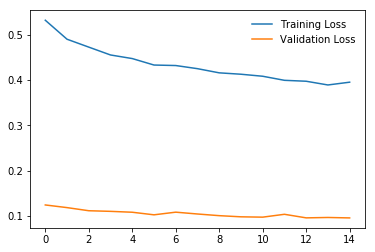

In [148]:
plt.plot(train_losses, label = "Training Loss")
plt.plot(valid_losses, label = "Validation Loss")
#plt.plot(test_losses, label = "Test Loss")
plt.legend(frameon=False)

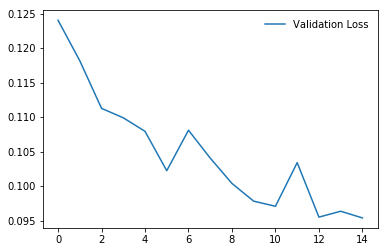

In [142]:
plt.plot(valid_losses, label = "Validation Loss")
plt.legend(frameon=False)

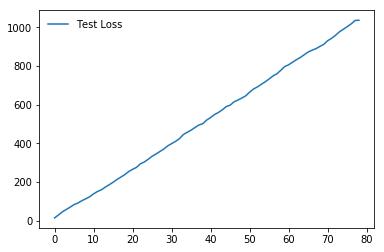

In [145]:
plt.plot(test_losses, label = "Test Loss")
plt.legend(frameon=False)

In [ ]:
pred

In [18]:
image, label = next(iter(test_loader))

tensor(1)


tensor([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 0, 0, 0, 0, 0])

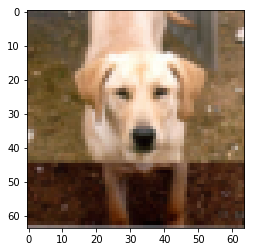

In [44]:
imshow(image[0])
print(label[0])
label

In [47]:
out = model.forward(image[0])
out = torch.exp(out)
print(out)

RuntimeError: Expected 4-dimensional input for 4-dimensional weight [16, 3, 3, 3], but got 3-dimensional input of size [3, 64, 64] instead

In [32]:
prediction = list(torch.max(out, 1))

pred


TypeError: max() received an invalid combination of arguments - got (tuple, int), but expected one of:
 * (Tensor input)
 * (Tensor input, Tensor other, Tensor out)
 * (Tensor input, int dim, bool keepdim, tuple of Tensors out)


In [27]:
torch.save(model.state_dict(), 'C:/Users/Henok/Desktop/WEEK 1/Cats and Dogs/Model states/cat_and_dog_Classifier_model.pt')